In [130]:
#Rossmann
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring Data

In [131]:
store = pd.read_csv('data/store.csv')
train = pd.read_csv('data/train.csv')

store.shape, train.shape

/Users/bahar/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


((1115, 10), (637774, 9))

In [132]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [133]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [134]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637774 entries, 0 to 637773
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           637774 non-null  object 
 1   Store          618473 non-null  float64
 2   DayOfWeek      618757 non-null  float64
 3   Sales          618747 non-null  float64
 4   Customers      618683 non-null  float64
 5   Open           618588 non-null  float64
 6   Promo          618580 non-null  float64
 7   StateHoliday   618520 non-null  object 
 8   SchoolHoliday  618437 non-null  float64
dtypes: float64(7), object(2)
memory usage: 43.8+ MB


In [135]:
train.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,2013-01-01,1115.0,2.0,0.0,0.0,0.0,0.0,a,1.0
1,2013-01-01,379.0,2.0,0.0,0.0,0.0,0.0,a,1.0
2,2013-01-01,378.0,2.0,0.0,0.0,0.0,0.0,a,1.0
3,2013-01-01,377.0,2.0,0.0,0.0,0.0,0.0,a,1.0
4,2013-01-01,376.0,2.0,0.0,0.0,0.0,0.0,a,1.0


In [136]:
# Cleaning data

# Change date to datetime
train['Date'] = pd.to_datetime(train['Date'], format='%Y-%m-%d')

# Drop training data with no store, convert store to int
train.dropna(axis=0, inplace=True, subset=['Store'])
train['Store'] = train['Store'].astype('int')

# Drop training data with no DayOfWeek, convert to int
train.dropna(axis=0, inplace=True, subset=['DayOfWeek'])
train['DayOfWeek'] = train['DayOfWeek'].astype('int')

# Drop train data where store isn't open
train = train[train['Open'] == 1]
train.drop(labels=['Open'], inplace=True, axis=1)

# Drop train data where promo is NaN, convert to int
train.dropna(axis=0, inplace=True, subset=['Promo'])
train['Promo'] = train['Promo'].astype('int')

# Drop SchoolHoliday data where promo is NaN, convert to int
train.dropna(axis=0, inplace=True, subset=['SchoolHoliday'])
train['SchoolHoliday'] = train['SchoolHoliday'].astype('int')

# Drop Params the don't seem useful
store.drop(labels=['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', \
                      'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'], inplace=True, axis=1)

# Drop all rows with NaNs - Approx 3% of rows
store.dropna(inplace=True)
train.dropna(inplace=True)

## Encoding

In [137]:
# Convert StateHoliday to dummy varibles
dummies = pd.get_dummies(train['StateHoliday'], prefix='StateHoliday')[['StateHoliday_a','StateHoliday_b', 'StateHoliday_c']]
train = pd.concat([train, dummies], axis=1)
train.drop(labels=['StateHoliday'], inplace=True, axis=1)

# Convert StoreType to dummy varibles
dummies = pd.get_dummies(store['StoreType'], prefix='StoreType')
store = pd.concat([store, dummies], axis=1)
store.drop(labels=['StoreType'], inplace=True, axis=1)

# Convert Assortment to dummy varibles
dummies = pd.get_dummies(store['Assortment'], prefix='Assortment')
store = pd.concat([store, dummies], axis=1)
store.drop(labels=['Assortment'], inplace=True, axis=1)

In [138]:
# Concatenate all data
data = pd.merge(train, store, on=["Store"])
data.isna().sum() / data.shape[0]

Date              0.0
Store             0.0
DayOfWeek         0.0
Sales             0.0
Customers         0.0
Promo             0.0
SchoolHoliday     0.0
StateHoliday_a    0.0
StateHoliday_b    0.0
StateHoliday_c    0.0
Promo2            0.0
StoreType_a       0.0
StoreType_b       0.0
StoreType_c       0.0
StoreType_d       0.0
Assortment_a      0.0
Assortment_b      0.0
Assortment_c      0.0
dtype: float64

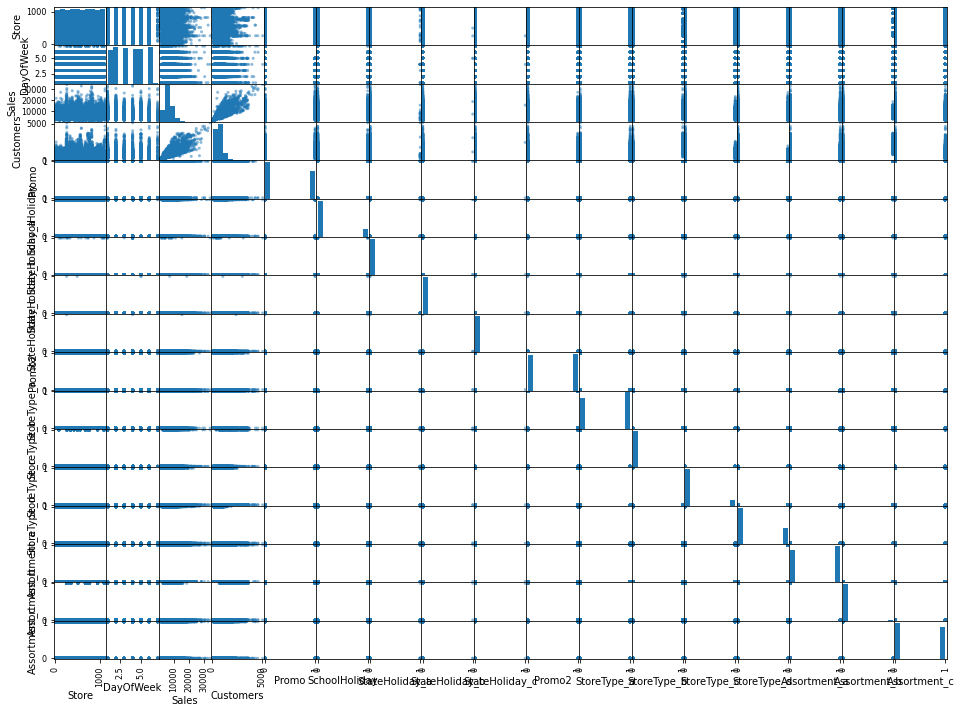

In [139]:
#Plot scatters against Sales
plt.rcParams['figure.figsize'] = [16, 12]
_ = pd.plotting.scatter_matrix(data.sample(n=20_000))

<AxesSubplot:>

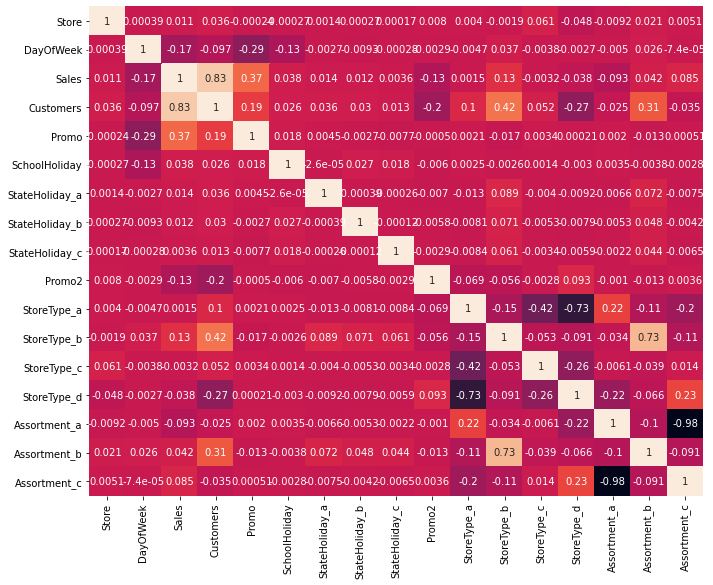

In [140]:
plt.subplots(figsize=(11, 9))
sns.heatmap(data.corr(), cbar=False, annot=True)

In [141]:
data.corr()["Sales"]

Store             0.010607
DayOfWeek        -0.174561
Sales             1.000000
Customers         0.827437
Promo             0.371947
SchoolHoliday     0.038049
StateHoliday_a    0.013591
StateHoliday_b    0.011653
StateHoliday_c    0.003619
Promo2           -0.128749
StoreType_a       0.001513
StoreType_b       0.134741
StoreType_c      -0.003154
StoreType_d      -0.038005
Assortment_a     -0.092825
Assortment_b      0.041824
Assortment_c      0.084749
Name: Sales, dtype: float64

## Test / Train Split

In [142]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

NameError: name 'X' is not defined